<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Francisca Ruiz
- Nombre de alumno 2: Valentina Zúñiga


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/...../)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1.
2.
3.
4. El particionamiento en Spark es relevante ya que optimiza el rendimiento del procesamiento de datos, debido a que al distribuir los datos en segmentos, se facilita que los ejecutores de Spark procesen datos que se encuentran físicamente más próximos a ellos, reduciendo el uso del ancho de banda necesario para la transferir datos. Así, a cada núcleo de procesamiento de un ejecutor se le asigna una partición específica sobre la cual trabajar, lo cual maximiza la eficiencia de procesamiento y minimiza tiempos de ejecución.
5. La función de Spark Driver es de manera fundamental instanciar la SparkSession, lo cual incluye comunicarse con el gestor de clúster para solicitar recursos que utilizarán los ejecutores de Spark y transformas las operaciones definidas en el código en gráficos (DAGs) que permiten ejecutar de manera eficiente las tareas. Por otro lado, Spark Executor se encarga de operar en cada nodo dentro del clúster, comunicandose con el programa conductor, de esta manera, llevan a cabo las tareas asignados por el conductor en los nodos de trabajo, procesando datos y entregando los resultados al conductor.
6. El Catalyst Optimizer es el componente encargado de la optimización de consultas en Spark, cuya función principal es transformar las consultas SQL en planes de ejecución optimizados, para ello utiliza diversas técnicas de optimización para generar planes eficientes, tanto en términos de recursos computacionales como de tiempos de ejecución. Además, realiza la construcción de un Árbol de Sintaxis Abstracta (AST), lo que le permite analizar la estructura de las tablas y las operaciones solicitadas dentro de la consulta, facilitando así un procesamiento más efectivo.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=4eadeda25fde95b5751abeff7a30bae3bfba93e36e2e5f791f892b6d6952da26
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
# Descarga dataset
!wget "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet"
!wget "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"

--2024-09-11 23:55:26--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M   148MB/s    in 0.5s    

2024-09-11 23:55:26 (148 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]

--2024-09-11 23:55:27--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894 [application/octet-stream]
Saving to: ‘object.pkl’

object.pkl          100%[===================>]     894

In [4]:
# Se crea la sesión de spark
spark_session = SparkSession.builder.appName("Data Spark").getOrCreate()

# Carga datasets
df_spark = spark_session.read.parquet("datos_lab_spark.parquet")

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [5]:
# Se revisa la estructura de los datos
print('1. Estructura de los datos:')
df_spark.printSchema()

# Se muestran las primeras 10 filas del dataset
print('\n2. Muestra de primeras 10 filas:')
df_spark.show(10)

# Se imprime muestreo alteatorio con el 5% de los datos
print('\n3. Muestreo aleatorio con el 5% de los datos:')
muestra = df_spark.sample(fraction=0.05)
muestra.show()

# Se revisa los tipos de datos de cada columna
print('\n4. Tipos de datos de cada columna:')
columns = df_spark.dtypes
for column, tipo in columns:
    print(f"Nombre columna es {column}: Su tipo de dato es {tipo}")

1. Estructura de los datos:
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)


2. Muestra de primeras 10 filas:
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+----------

A partir de la pregunta 4, se puede ver que las columnas que tienen datos no adecuados son:
1.   Is An Alien, deberia ser INT ya que es 0 si es humano y 1 si es alien, pero en las tablas esta como double.
2.   Quantity, deberia ser un INT, pero en la columna esta como double.
3.   Customer Age, deberia ser un INT pero en la columna esta como double (la edad es número entero)
4.   Account Age Days, deberia ser un INT, sucede lo mismo que en lo anterior.



In [6]:
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for columna, tipo in cols_types.items():
        df = df.withColumn(columna, df[columna].cast(tipo))
    return df

In [7]:
# Se crea el diccionario con las columnas con tipo de datos equivocados
dict_wrong_columns = {'Is An Alien': IntegerType(), 'Quantity': IntegerType(), 'Customer Age': IntegerType(), 'Account Age Days': IntegerType()}
df_spark = cast_columns(df_spark, dict_wrong_columns)

In [9]:
from pyspark.sql.functions import when, col, sum

# Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
print('6. Cantidad de nulos por variable')
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df_spark.columns]
df_spark.agg(*exprs).show()

# Elimine datos nulos.
print('\n7. Se eliminan datos nulos')
df_spark = df_spark.na.drop()
df_spark.show()

# Elimine datos duplicados.
print('\n8. Se eliminan datos duplicados (en base a Transaction ID)')
df_spark = df_spark.dropDuplicates(['Transaction ID'])
df_spark.show()

6. Cantidad de nulos por variable
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+---------

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [67]:
from pyspark.sql.functions import col, abs, log, month, when, count, avg
# 1. Se agrega columna
df_spark = df_spark.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount") ** 36)))

# 2. Se crea una columna Transaction Month
df_spark = df_spark.withColumn("Transaction Month", month("Transaction Date"))

# 3. Se crea variable
df_spark = df_spark.withColumn("Type of purchase", when(df_spark["Quantity"]<=4, "Compra Minorista").otherwise("Compra Mayorista"))

# 4. Se imprimen los registros
alienigenas_mayoristas = df_spark.filter((df_spark["Is An Alien"] == 1) & (df_spark["Type of purchase"] == "Compra Minorista"))

# 5. Se cuenta la cantidad de compras
cantidad_compras = df_spark.groupby("Is An Alien").count()

# 6. Recaudación por Transacción
recaudacion = df_spark.groupby("Payment Method").pivot("Is An Alien").mean("Transaction Amount")

recaudacion.show()

+--------------+------------------+-----------------+
|Payment Method|               0.0|              1.0|
+--------------+------------------+-----------------+
|    debit card|215.66604264659748|549.4418644067796|
| bank transfer|  214.751203556685|550.3845930232562|
|        PayPal| 214.8426181936741|469.5177647058822|
|   credit card|206.09774070543347|520.4671686746989|
+--------------+------------------+-----------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [68]:
# 1. Conversión del DataFrame a formato pandas
df_pandas = df_spark.toPandas()

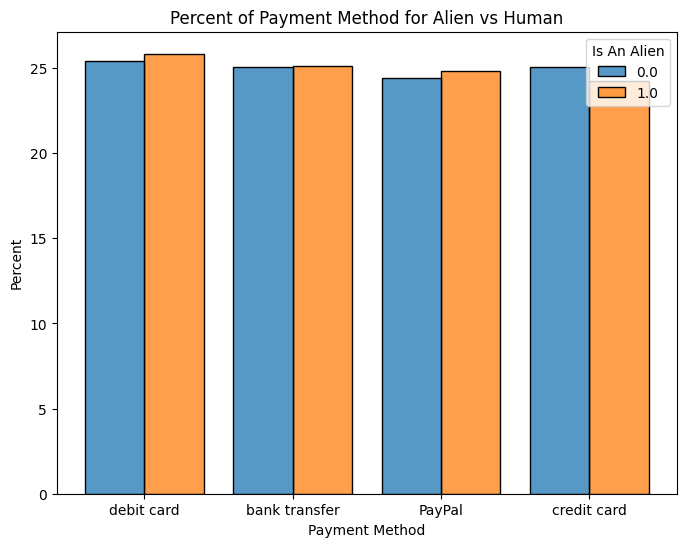

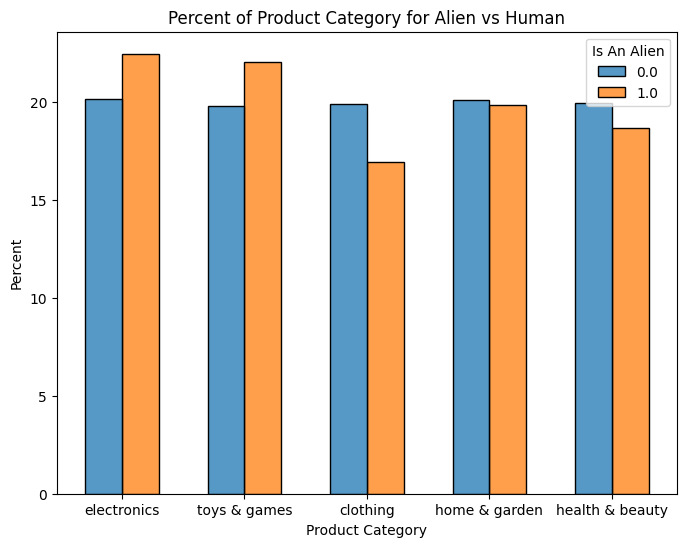

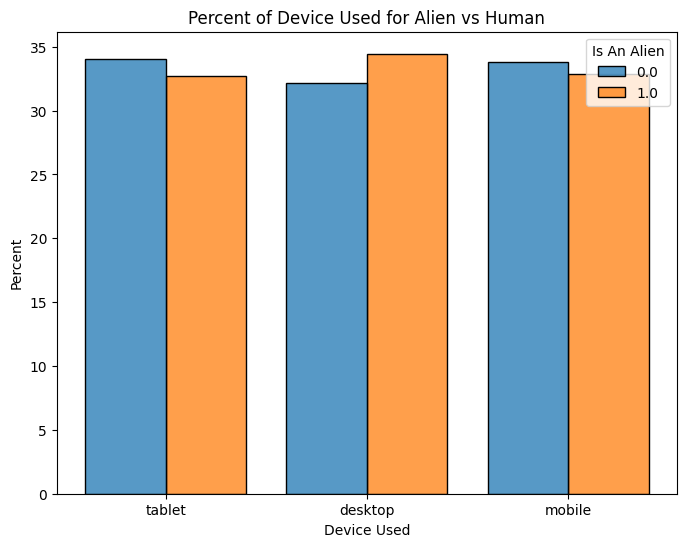

In [69]:
# 2. Visualización de Variables Categóricas
import seaborn as sns

# 2.1 Alien y Payment Method
# Obtenemos conteo total de cada Payment Method segun si es Alien o no
plt.figure(figsize=(8, 6))
sns.histplot(data=df_pandas, x='Payment Method', hue='Is An Alien', stat = 'percent', multiple="dodge", shrink = 0.8, common_norm=False)
plt.title('Percent of Payment Method for Alien vs Human')
plt.xlabel('Payment Method')
plt.ylabel('Percent')
plt.show()

# 2.2 Alien y Product Category
plt.figure(figsize=(8, 6))
sns.histplot(data=df_pandas, x='Product Category', hue='Is An Alien', stat = 'percent', multiple="dodge", shrink = 0.6, common_norm=False)
plt.title('Percent of Product Category for Alien vs Human')
plt.xlabel('Product Category')
plt.ylabel('Percent')
plt.show()

# 2.3 Alien y Device Used
plt.figure(figsize=(8, 6))
sns.histplot(data=df_pandas, x='Device Used', hue='Is An Alien', stat = 'percent', multiple="dodge", shrink = 0.8, common_norm=False)
plt.title('Percent of Device Used for Alien vs Human')
plt.xlabel('Device Used')
plt.ylabel('Percent')
plt.show()

Para esta pregunta, se utilizaron las columnas Payment Method, Product Category y Device Used para realizar comparaciones entre humanos y aliens, la elección de estas columnas se debió a que presentan menos categorías, lo que facilita su análisis. Es importante mencionar que, para una comparación más efectiva, los totales por barra se convirtieron en porcentajes, dado que los datos presentan una asimetría (hay un mayor número de humanos en comparación con aliens), lo que dificultaba la comparación directa.

Al observar las gráficas obtenidas, se puede apreciar que los porcentajes son bastante similares entre ambos grupos, con solo diferencias mínimas.

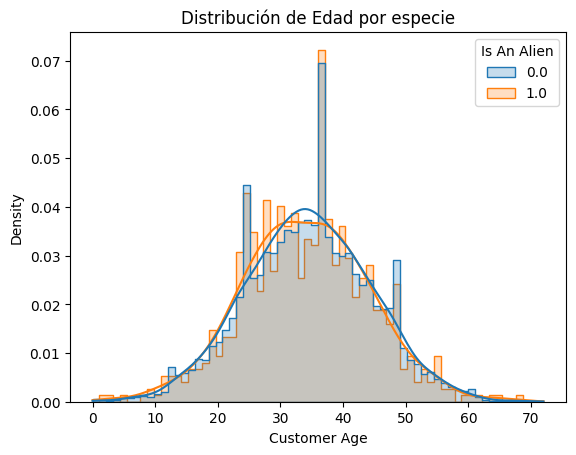

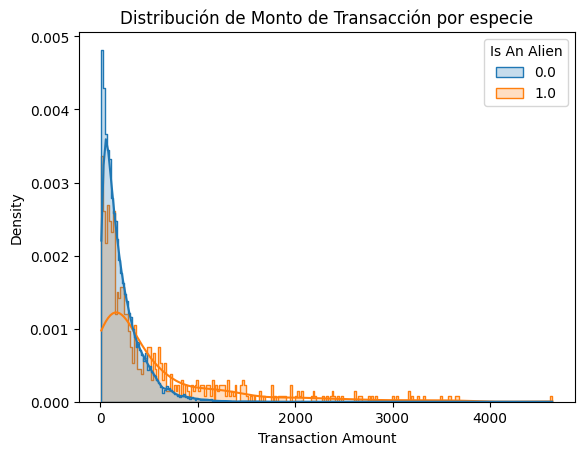

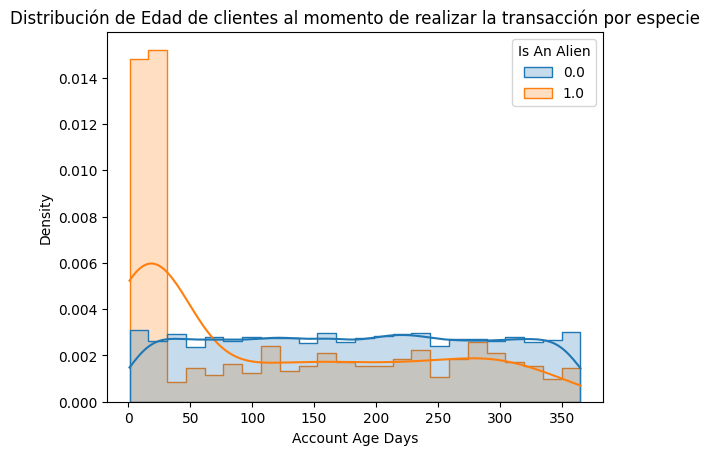

In [85]:
# 3. Elabore tres distplots para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens.

# 3.1 Se utiliza edad por humanos/aliens
sns.histplot(data=df_pandas, x='Customer Age', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución de Edad por especie')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.show()

# 3.2 Se utiliza Monto de Transacción por humanos/aliens
sns.histplot(data=df_pandas, x='Transaction Amount', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución de Monto de Transacción por especie')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# 3.2 Se utiliza Edad de la cuenta en dias por humanos/aliens
sns.histplot(data=df_pandas, x='Account Age Days', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución de Edad de clientes al momento de realizar la transacción por especie')
plt.xlabel('Account Age Days')
plt.ylabel('Density')
plt.show()

En este análisis, se utilizaron las columnas Customer Age, Transaction Amount y Account Age Days para realizar comparaciones entre variables numéricas de especies.

Al observar las gráficas obtenidas, se evidencia que, en el primer caso, la distribución de las edades es bastante similar entre las especies; sin embargo, se nota una mayor densidad de edades entre los aliens, especialmente en el rango de 30 a 40 años. En el segundo caso, los montos de transacción son más elevados para los aliens, ya que la curva de los humanos desciende rápidamente, alcanzando aproximadamente los 1.000, mientras que la de los aliens se mantiene hasta alrededor de 3.000. Por último, en lo que respecta a la antigüedad de la cuenta de los clientes en días al momento de realizar la transacción, se observa una tendencia entre los aliens a haber realizado compras con cuentas relativamente nuevas, en un rango de entre 0 y 50 días.

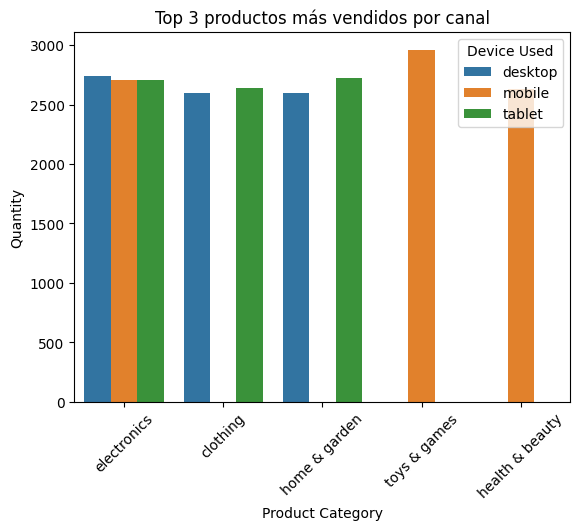

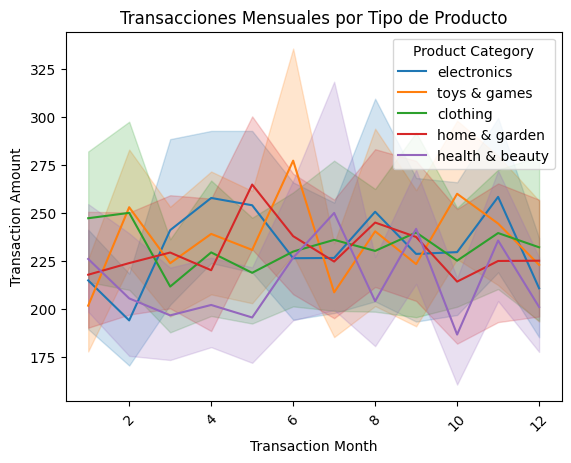

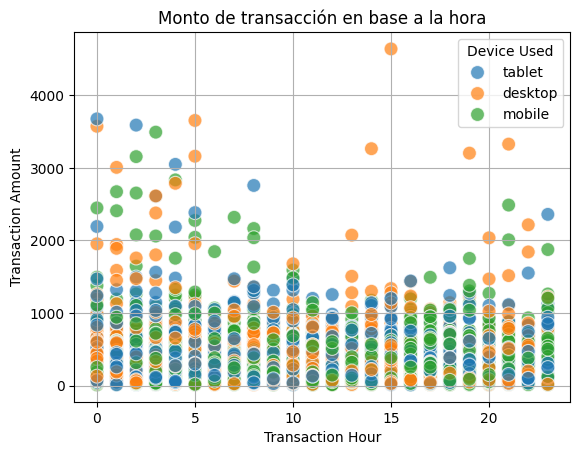

In [84]:
# 4.1 Se genera barplot que exhibe los tres productos más vendidos por canal

# Agrupamos por device y categoria, luego se suma la cantidad vendida
product_per_device = df_pandas.groupby(['Device Used', 'Product Category'])['Quantity'].sum().reset_index()
top_3 = product_per_device.groupby('Device Used').apply(lambda x: x.nlargest(3, 'Quantity')).reset_index(drop=True)

sns.barplot(data=top_3, x='Product Category', y='Quantity', hue='Device Used')
plt.title('Top 3 productos más vendidos por canal')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Device Used')
plt.show()

# 4.2 Cantidad de transacciones mensuales por canal de venta

sns.lineplot(data=df_pandas, x='Transaction Month', y='Transaction Amount', hue='Product Category')
plt.title('Transacciones Mensuales por Tipo de Producto')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# 4.3
sns.scatterplot(data=df_pandas, x='Transaction Hour', y='Transaction Amount', hue='Device Used', s=100, alpha=0.7)
plt.title('Monto de transacción en base a la hora')
plt.xlabel('Transaction Hour')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.legend(title='Device Used')
plt.show()


Por último, para realizar gráficos avanzados, se consideraron los siguientes puntos:

1. Se elaboró un top 3 de los productos más vendidos por canal (dispositivos), en este análisis, se observa que los electrónicos ocupan una posición en el top 3 en los tres tipos de canal. Además, tanto desktop como tablet comparten las categorías de clothing y home & garden, mientras que mobile se destaca por incluir toys y health. En general, la cantidad vendida es bastante similar entre los distintos canales.

2. Se generó un gráfico de transacciones mensuales por tipo de producto, este revela que la categoría con el mayor número de ventas es toys & games, mientras que la menos adquirida es health & beauty, en términos generales.

3. Finalmente, se creó un gráfico que muestra el monto de las transacciones en función de la hora del día en que se realizaron. Además, se incluyó la variable del tipo de dispositivo utilizado. En términos generales, se observa que desktop presenta montos más altos entre las 15 y 22 horas, destacándose por su crecimiento notable, ya que los demás dispositivos se concentran en montos más bajos a lo largo de todo día.



### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [15]:
#1 Creación de Tabla con PySpark

df = df_spark.toPandas()

# Se crea sesión
spark_bodoque = SparkSession.builder \
    .appName("Bodoque e-Shop") \
    .getOrCreate()

# Se convierte dataframe a PySparks
df_bodoque = spark_bodoque.createDataFrame(df)

# Se crea tabla SQL
df_bodoque.createOrReplaceTempView("transaccion")

# Se guarda la tabla y se realiza la partición con la columna 'Transaction Date' ya que esta resulta más representativa
df_bodoque.write.partitionBy("Transaction Date").format("parquet").save("lab_parquet/")

In [16]:
# 2. Consulta SQL para Principales Clientes
query = """SELECT `Customer ID`, SUM(`Quantity`) AS TotalProductosComprados
        FROM transaccion
        GROUP BY `Customer ID`
        ORDER BY TotalProductosComprados DESC
        LIMIT 10; """

result = spark_bodoque.sql(query)
result.show()

+--------------------+-----------------------+
|         Customer ID|TotalProductosComprados|
+--------------------+-----------------------+
|ddc0c022-a4c7-4c7...|                      5|
|cb988127-b0ea-447...|                      5|
|a1f61636-d50b-434...|                      5|
|62b1ce0c-5495-43e...|                      5|
|f920f562-dfd4-458...|                      5|
|aa8c72f5-fbcc-4bf...|                      5|
|abc58f3b-387c-455...|                      5|
|95abc5e6-cabd-41b...|                      5|
|c68159a4-9116-45d...|                      5|
|ead66455-449e-491...|                      5|
+--------------------+-----------------------+



In [44]:
# 3. Implementación de Función de Ventana en SQL y Equivalente en Spark
query = """ SELECT `Customer ID`, MAX(`Transaction Amount`) AS MaxTransactionAmount
            FROM (SELECT `Customer ID`, `Transaction Amount`, ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Amount` DESC) AS row
                  FROM transaccion
                  WHERE `Transaction Date` >= DATE_SUB(CURRENT_DATE(), 90)
                  ) a
            WHERE a.row = 1
            GROUP BY `Customer ID` """

result = spark_bodoque.sql(query)
result.show()

+--------------------+--------------------+
|         Customer ID|MaxTransactionAmount|
+--------------------+--------------------+
|0084aeb6-6bc7-4f8...|              265.09|
|00dba4f3-102b-4d8...|               80.76|
|011ba8d6-6dcd-4cf...|              218.64|
|014817a0-2f4f-477...|              289.72|
|014da57c-a59c-465...|               33.22|
|01754c8a-c873-49e...|              267.89|
|0178fe5b-e055-4ec...|              723.04|
|01ac1427-4acc-410...|              234.43|
|01feca2f-2907-445...|               48.71|
|03557036-602b-4f5...|                29.8|
|03c61a84-77db-4aa...|              269.66|
|0464bbaa-d5e0-41c...|              425.34|
|04c9816c-3a7a-41a...|              707.63|
|04d42160-5adb-4ff...|              174.46|
|04fa4322-5441-419...|              392.13|
|04feae5e-bac1-447...|              192.41|
|050b31c8-af17-4bb...|               228.1|
|054ab1d4-1f6d-44a...|              235.96|
|059e582d-2dfd-416...|                65.4|
|05c814fe-5da6-458...|          

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [52]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import pickle

In [54]:
# 1. Cargamos el objeto serializado
with open('object.pkl', 'rb') as file:
    object_pkl = pickle.load(file)

# Se imprime y se aprecia que es una función que permite hacer regresión
object_pkl

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


LogisticRegression(random_state=0)

In [55]:
# 2. Se explora el objeto y se aprecia que la regresión se realiza con predict_proba

print(dir(object_pkl))
help(object_pkl)

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [56]:
# 3. Crear una función personalizada
def prediccion_fraude(Transaction_Amount, Quantity, Customer_Age, Transaction_Hour):
  """
  Funcion que predice la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado
  """
  column_predict = [[Transaction_Amount, Quantity, Customer_Age, Transaction_Hour]]

  # Se usa el método de predicción
  prediccion = object_pkl.predict_proba(column_predict)
  probabilidad = prediccion[-1][-1]

  return float(probabilidad)

# 4. Se define la función UDF
udf_function = udf(prediccion_fraude, FloatType())

# 5. Se genera una nueva columna
df_spark = df_spark.withColumn('prediction', udf_function('Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour'))

In [57]:
df_spark.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+-----------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour| prediction|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+-----------+
|000ebb9d-d512-40f...|9d6ab2e2-aefe-4ed...|            243.12|2023-03-21 00:00:00|    debit card|     electronics|       3|          37|       East 

 Muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?